**Task 1**

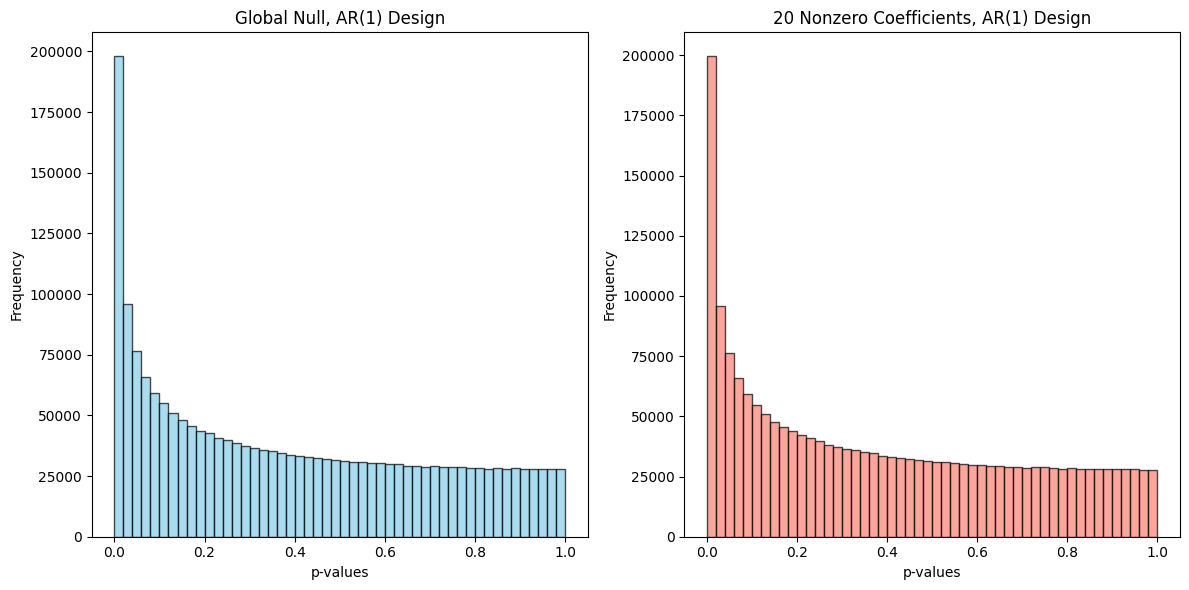

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  # Import statsmodels

# Function to generate null logistic regression p-values
def generate_p_values(n, p, num_replications, nonzero_coefficients=None):
    p_values = []
    for _ in range(num_replications):
        X = np.random.randn(n, p)
        if nonzero_coefficients is not None:
            X[:, :len(nonzero_coefficients)] += nonzero_coefficients
        y = np.random.binomial(1, 0.5, size=n)
        model = sm.Logit(y, X)
        result = model.fit(disp=False)
        p_values.append(result.pvalues)
    return np.concatenate(p_values)

# Parameters
n = 500
p = 200
num_replications = 10000

# Generate p-values for Global Null scenario
p_values_global_null = generate_p_values(n, p, num_replications)

# Generate p-values for 20 Nonzero Coefficients scenario
nonzero_coefficients = np.zeros(p)
nonzero_coefficients[:20] = 2.0  # Setting nonzero coefficients for the first 20 variables
p_values_20_nonzero = generate_p_values(n, p, num_replications, nonzero_coefficients)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(p_values_global_null, bins=50, color='skyblue', edgecolor= 'black', alpha=0.7)
axes[0].set_title('Global Null, AR(1) Design')
axes[0].set_xlabel('p-values')
axes[0].set_ylabel('Frequency')

axes[1].hist(p_values_20_nonzero, bins=50, color='salmon', edgecolor= 'black', alpha=0.7)
axes[1].set_title('20 Nonzero Coefficients, AR(1) Design')
axes[1].set_xlabel('p-values')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**Task 4**

Performing randomization test: 100%|██████████| 1000/1000 [00:16<00:00, 61.60iteration/s]


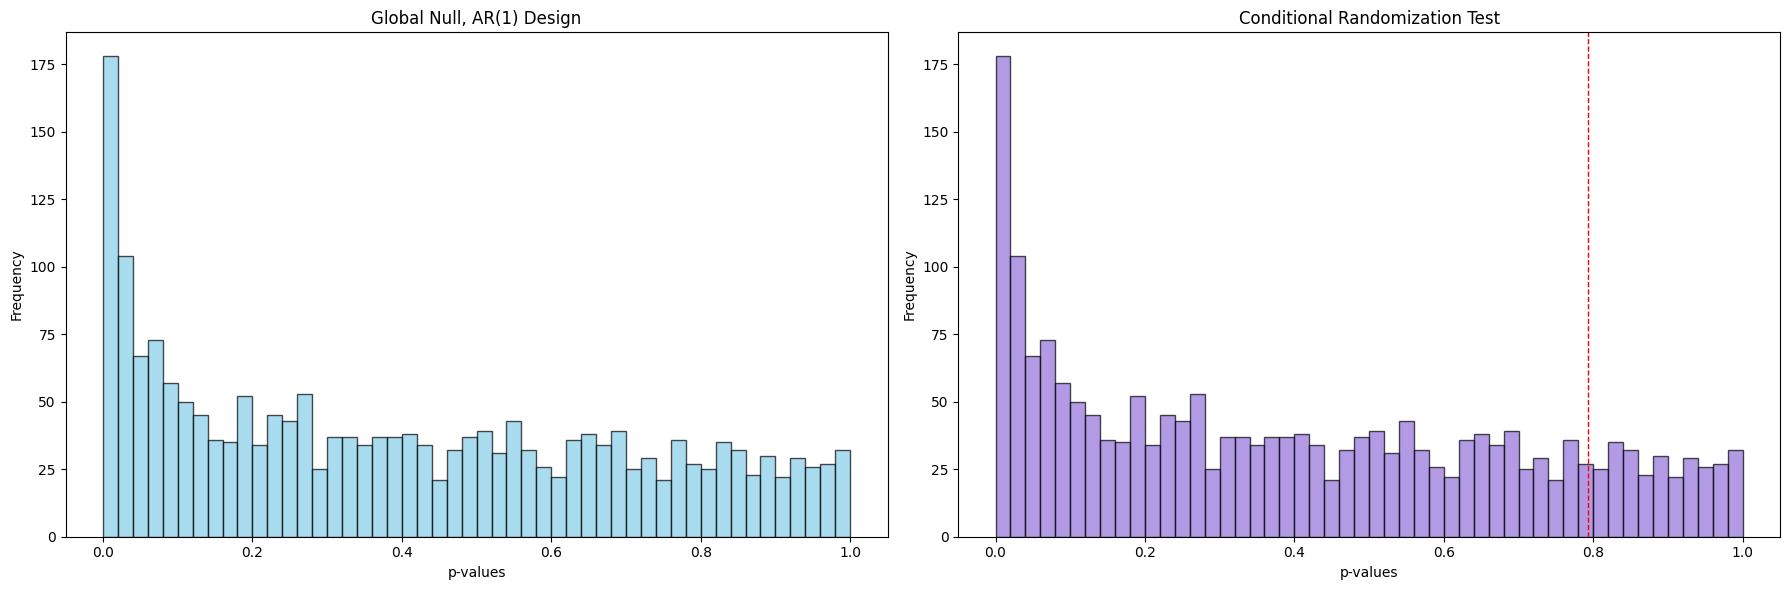

In [15]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm  # Import tqdm for progress bar

# Function to generate null logistic regression p-values
def generate_p_values(n, p, num_replications, nonzero_coefficients=None):
    p_values = []
    for _ in range(num_replications):
        X = np.random.randn(n, p)
        if nonzero_coefficients is not None:
            X[:, :len(nonzero_coefficients)] += nonzero_coefficients
        y = np.random.binomial(1, 0.5, size=n)
        model = sm.Logit(y, X)
        result = model.fit(disp=False)
        p_values.append(result.pvalues)
    return np.concatenate(p_values)

# Function to perform conditional randomization test
def conditional_randomization_test(X, y, num_permutations=1000):
    # Fit logistic regression model to observed data
    model = LogisticRegression(penalty='none', solver='lbfgs')
    model.fit(X, y)
    observed_coef = model.coef_[0]

    # Compute test statistic for observed data
    observed_statistic = observed_coef[0]  # Assuming we're interested in the coefficient of the first predictor

    # Initialize array to store randomized statistics
    randomized_statistics = np.zeros(num_permutations)

    # Perform randomization test with progress bar
    for i in tqdm(range(num_permutations), desc="Performing randomization test", unit="iteration"):
        # Randomly permute the response variable
        y_permuted = np.random.permutation(y)

        # Fit logistic regression model to randomized data
        model.fit(X, y_permuted)
        randomized_coef = model.coef_[0]

        # Compute test statistic for randomized data
        randomized_statistics[i] = randomized_coef[0]  # Assuming we're interested in the coefficient of the first predictor

    # Compute p-value
    p_value = (np.sum(np.abs(randomized_statistics) >= np.abs(observed_statistic)) + 1) / (num_permutations + 1)

    return p_value

# Parameters
n = 500
p = 200
num_replications = 10

# Generate p-values for Global Null scenario
p_values_global_null = generate_p_values(n, p, num_replications)

# Generate p-values for 20 Nonzero Coefficients scenario
nonzero_coefficients = np.zeros(p)
nonzero_coefficients[:20] = 2.0  # Setting nonzero coefficients for the first 20 variables
p_values_20_nonzero = generate_p_values(n, p, num_replications, nonzero_coefficients)

# Generate p-values using conditional randomization test
X = np.random.randn(n, p)
y = np.random.binomial(1, 0.5, size=n)

# Perform conditional randomization test
crt_p_value = conditional_randomization_test(X, y)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].hist(p_values_global_null, bins=50, color='skyblue', edgecolor= 'black', alpha=0.7)
axes[0].set_title('Global Null, AR(1) Design')
axes[0].set_xlabel('p-values')
axes[0].set_ylabel('Frequency')

# axes[1].hist(p_values_20_nonzero, bins=50, color='salmon', edgecolor= 'black', alpha=0.7)
# axes[1].set_title('20 Nonzero Coefficients, AR(1) Design')
# axes[1].set_xlabel('p-values')
# axes[1].set_ylabel('Frequency')

axes[1].axvline(crt_p_value, color='red', linestyle='dashed', linewidth=1)
axes[1].hist(p_values_global_null, bins=50, color='mediumpurple', edgecolor= 'black', alpha=0.7)
axes[1].set_title('Conditional Randomization Test')
axes[1].set_xlabel('p-values')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
